<a href="https://colab.research.google.com/github/jeenathampi/dimensionality_reduction/blob/master/DimensionalityReductionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction with image dataset

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import plotly.io as plt_io
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA, TruncatedSVD
#TSNE
from sklearn.manifold import TSNE
#UMAP
import umap.umap_ as umap
#ISOMAP
from sklearn.manifold import Isomap
#LLE
from sklearn.manifold import LocallyLinearEmbedding

In [77]:
X = pd.read_csv("https://dataminingassignment.s3.amazonaws.com/sign_mnist_train.csv")
Y = pd.read_csv("https://dataminingassignment.s3.amazonaws.com/sign_mnist_test.csv")

In [78]:
X.shape

(27455, 785)

In [79]:
X.head()

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      3     107     118     127  ...       206       204       203       202
1      6     155     157     156  ...       175       103       135       149
2      2     187     188     188  ...       198       195       194       195
3      2     211     211     212  ...       225       222       229       163
4     13     164     167     170  ...       157       163       164       179

[5 rows x 785 columns]

In [80]:
X = X[X['label'] < 10]

In [81]:
X

label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0          3     107     118     127  ...       206       204       203       202
1          6     155     157     156  ...       175       103       135       149
2          2     187     188     188  ...       198       195       194       195
3          2     211     211     212  ...       225       222       229       163
6          8     134     134     135  ...       179       181       181       179
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
27429      5     114     113     112  ...       173       169       141       133
27432      2     164     166     167  ...       224       229       222       229
27435      1     181     182     183  ...        38        27        33        45
27440      5     174     177     179  ...       220       220       220       220
27442      0     181     182     181  ...       182       182       182       180

[9902 rows x 785 columns]

In [82]:
y = X.loc[:,'label'].values
x = X.loc[:,'pixel1':].values

In [83]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [84]:
## Standardizing the data
standardized_data = StandardScaler().fit_transform(x)

In [85]:
y

array([3, 6, 2, ..., 1, 5, 0])

Text(0.5, 1.0, 'label: 13  letter: M')

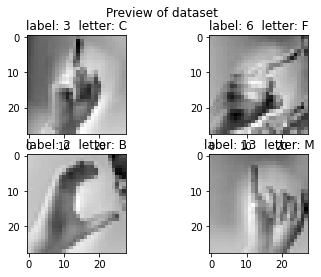

In [86]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(standardized_data[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(standardized_data[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(standardized_data[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(standardized_data[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

## PCA

In [87]:
#PCA
pca_dims = PCA()
pca_dims.fit(standardized_data)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [88]:
d

87

In [89]:
## Importing and Apply PCA
start = time.time()
pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(standardized_data)
principal_df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
principal_df.shape
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.1453008651733398 seconds


In [90]:
def plot_2d(component1, component2):
    
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=20,
            color=y, #set color equal to a variable
            colorscale='Rainbow', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=2000,height=1200)                 
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [91]:
def plot_3d(component1,component2,component3):

    fig = go.Figure(data=[go.Scatter3d(
        x=component1,
        y=component2,
        z=component3,
        mode='markers',
        marker=dict(
            size=10,
            color=y,                # set color to an array/list of desired values
            colorscale='Rainbow',   # choose a colorscale
            opacity=1,
            line_width=1
        )
    )])

    # tight layout
    fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1800,height=1000)
    fig.layout.template = 'plotly_dark'
    
    fig.show()

In [92]:
plot_2d(principalComponents[:, 0],principalComponents[:, 1])

In [93]:
plot_3d(principalComponents[:, 0],principalComponents[:, 1],principalComponents[:, 2])

In [94]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(standardized_data)
X_recovered = pca.inverse_transform(X_reduced)

In [95]:
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (9902, 87)
recovered shape: (9902, 784)


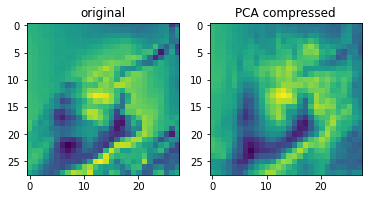

In [96]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(standardized_data[1].reshape((28,28)))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[1].reshape((28,28)))
plt.show(block=True)

## TSNE

In [97]:
#TSNE
start = time.time()
pca_d = PCA(n_components=d)
pca_result_d = pca_d.fit_transform(standardized_data)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_d)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 116.95869207382202 seconds


In [98]:
plot_2d(tsne[:, 0],tsne[:, 1])

In [99]:
plot_3d(tsne[:, 0],tsne[:, 1],tsne[:, 2])

##UMAP

In [100]:
#UMAP
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(standardized_data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 49.704736948013306 seconds


In [101]:
plot_2d(reducer.embedding_[:, 0],reducer.embedding_[:, 1])

In [102]:
plot_3d(reducer.embedding_[:, 0],reducer.embedding_[:, 1],reducer.embedding_[:, 2])

## SVD

In [103]:
#SVD
start = time.time()
u, s, v = np.linalg.svd(standardized_data, full_matrices=True)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 32.97398281097412 seconds


In [104]:
u.shape

(9902, 9902)

In [105]:
s.shape

(784,)

In [106]:
v.shape

(784, 784)

In [107]:
plot_2d(v[:, 0],v[:, 1])

In [108]:
plot_3d(v[:, 0],v[:, 1],v[:, 2])

## ISOMAP

In [109]:
#ISOMAP
model = Isomap(n_components=2)
start = time.time()
proj = model.fit_transform(standardized_data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 76.70101022720337 seconds


In [110]:
plot_2d(proj[:, 0],proj[:, 1])

## LLE

In [137]:
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
start = time.time()
out = model.fit_transform(standardized_data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 399.44345569610596 seconds


In [139]:
plot_2d(out[:, 0],out[:, 1])

The chosen image dataset for dimensionality reduction was sign language dataset.

PCA did not work quite well in categorizing the different signs. Chose number of dimensions as  2 and 3. As seen from the above the graph the clusters were not separated that much. The execution time was the best.

TSNE worked better on separating the clusters than PCA as seen from the graph above. However, the execution time was ~116s.

UMAP turned out to be the most effective in terms of displaying the different clusters with clear separations. The execution time was ~

SVD did not work well in separating out the clusters. Although the excution time was little better ~32s.

ISOMAP worked better than PCA and SVD in separating out the clusters. The execution time was ~76s

# Dimensionality Reduction with tabular dataset

In [112]:
from sklearn import datasets
data = datasets.load_breast_cancer()

In [113]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

mean radius  mean texture  ...  worst fractal dimension  target
0          17.99         10.38  ...                  0.11890       0
1          20.57         17.77  ...                  0.08902       0
2          19.69         21.25  ...                  0.08758       0
3          11.42         20.38  ...                  0.17300       0
4          20.29         14.34  ...                  0.07678       0
..           ...           ...  ...                      ...     ...
564        21.56         22.39  ...                  0.07115       0
565        20.13         28.25  ...                  0.06637       0
566        16.60         28.08  ...                  0.07820       0
567        20.60         29.33  ...                  0.12400       0
568         7.76         24.54  ...                  0.07039       1

[569 rows x 31 columns]

In [114]:
X = data.data
Y = data.target

In [115]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X)

In [116]:
transformed_df.shape

(569, 30)

## PCA

In [117]:
start = time.time()
pca = PCA(n_components=2, random_state = 1)
df_pca = pca.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.008526086807250977 seconds


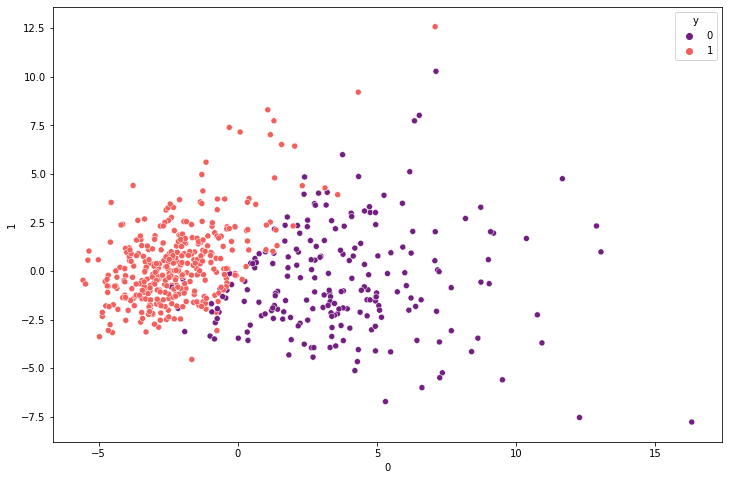

In [118]:
import seaborn as sns
df_vis = pd.DataFrame(df_pca)
df_vis['y'] = Y

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

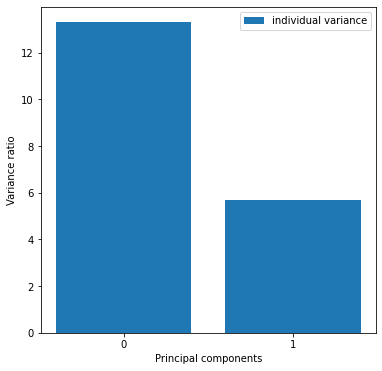

In [119]:
pca_variance = pca.explained_variance_

plt.figure(figsize=(6, 6))
plt.bar(['0', '1'], pca_variance, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [120]:
start = time.time()
pca = PCA(n_components=3, random_state = 1)
df_pca = pca.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.005868196487426758 seconds


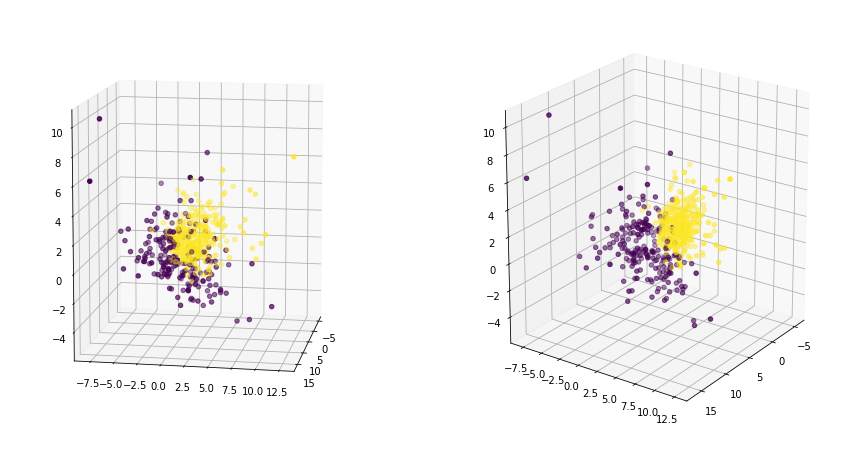

In [121]:
df_vis = pd.DataFrame(df_pca)
df_vis['y'] = Y

fig = plt.figure(figsize = (15, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(df_vis[0], df_vis[1], df_vis[2], c=df_vis['y'])
ax.view_init(10, 10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(df_vis[0], df_vis[1], df_vis[2], c=df_vis['y'])
ax.view_init(20, 35)

plt.show()

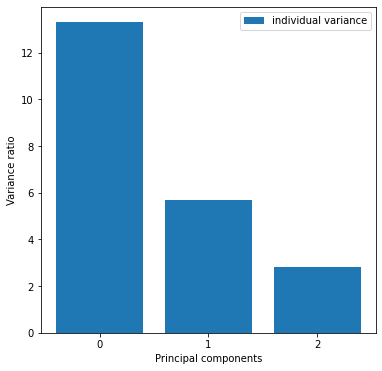

In [122]:
pca_variance = pca.explained_variance_

plt.figure(figsize=(6, 6))
plt.bar(['0', '1', '2'], pca_variance, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

##SVD

In [123]:
#SVD
start = time.time()
svd = TruncatedSVD(n_components=2, random_state = 1)
df_svd = svd.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.004259586334228516 seconds


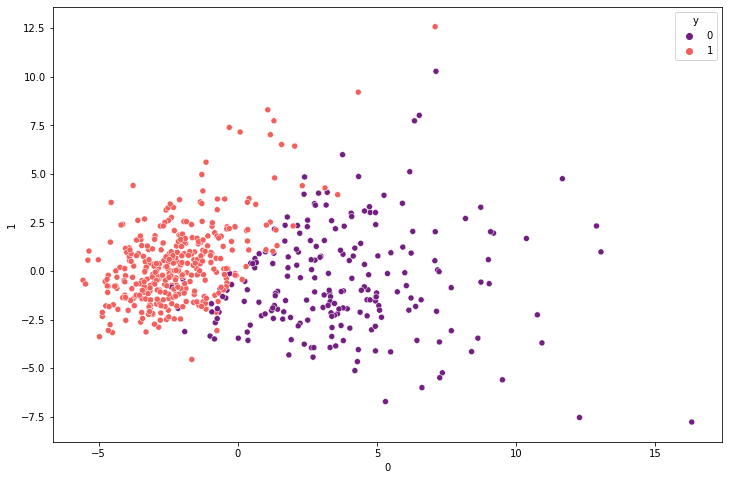

In [124]:
df_vis = pd.DataFrame(df_svd)
df_vis['y'] = Y

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

In [125]:
start = time.time()
svd = TruncatedSVD(n_components=3, random_state = 1)
df_svd = svd.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.010590314865112305 seconds


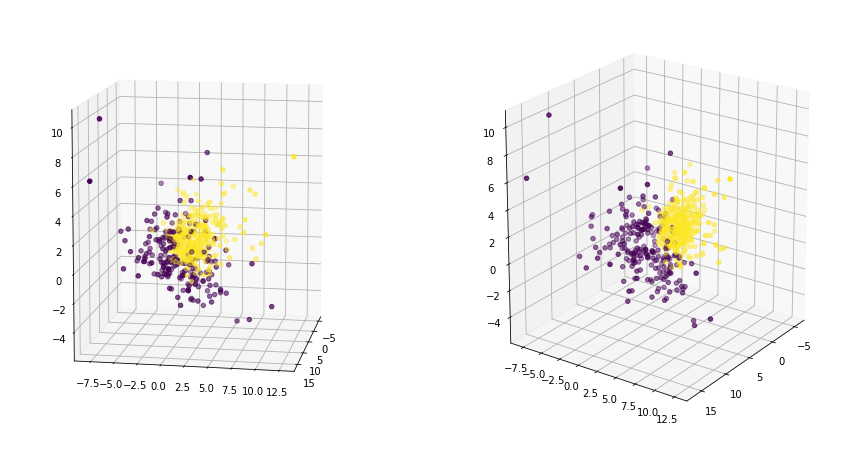

In [126]:
df_vis = pd.DataFrame(df_svd)
df_vis['y'] = Y

fig = plt.figure(figsize = (15, 8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(df_vis[0], df_vis[1], df_vis[2], c=df_vis['y'])
ax.view_init(10, 10)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(df_vis[0], df_vis[1], df_vis[2], c=df_vis['y'])
ax.view_init(20, 35)

plt.show()

##TSNE

In [127]:
#TSNE
start = time.time()
tsne = TSNE(
    n_components=2, 
    random_state = 1,
    n_iter = 1000,
    n_jobs = -1
)
df_tsne = tsne.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 4.154846429824829 seconds


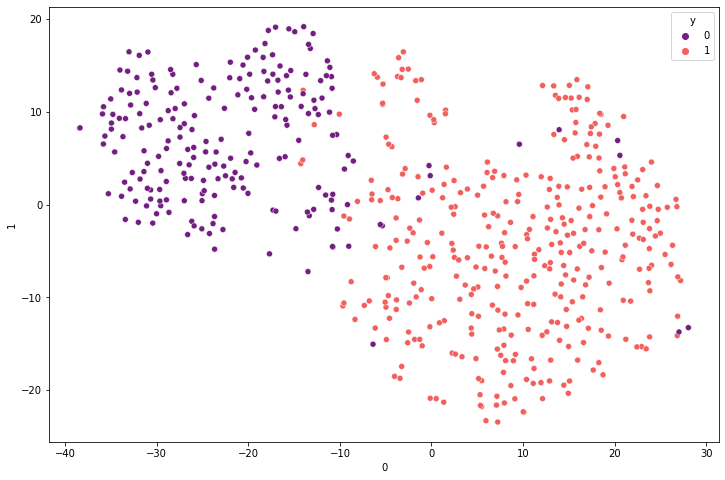

In [128]:
df_vis = pd.DataFrame(df_tsne)
df_vis['y'] = Y

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

##UMAP

In [129]:
#UMAP
start = time.time()
umap_m = umap.UMAP(
    n_components=2, 
    random_state=1, 
    n_neighbors=5
)

df_umap = umap_m.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 2.239558219909668 seconds


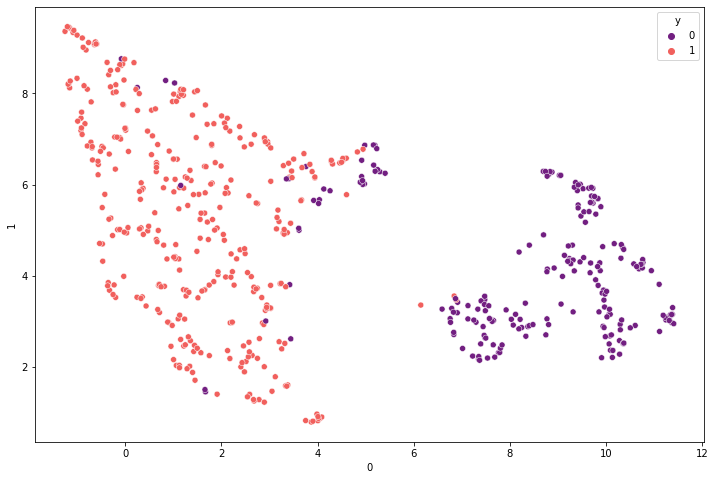

In [130]:
df_vis = pd.DataFrame(df_umap)
df_vis['y'] = Y

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

##LLE

In [131]:
#LLE
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified', eigen_solver='dense')
start = time.time()
df_lle = model.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.3681349754333496 seconds


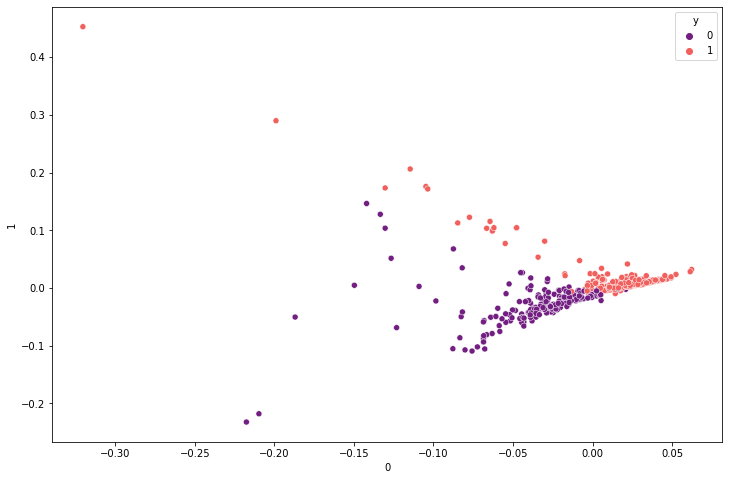

In [132]:
df_vis = pd.DataFrame(df_lle)
df_vis['y'] = Y

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

##ISOMAP

In [140]:
#ISOMAP
model = Isomap(n_components=2)
start = time.time()
df_isomap = model.fit_transform(transformed_df)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.19147467613220215 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning:

invalid value encountered in multiply



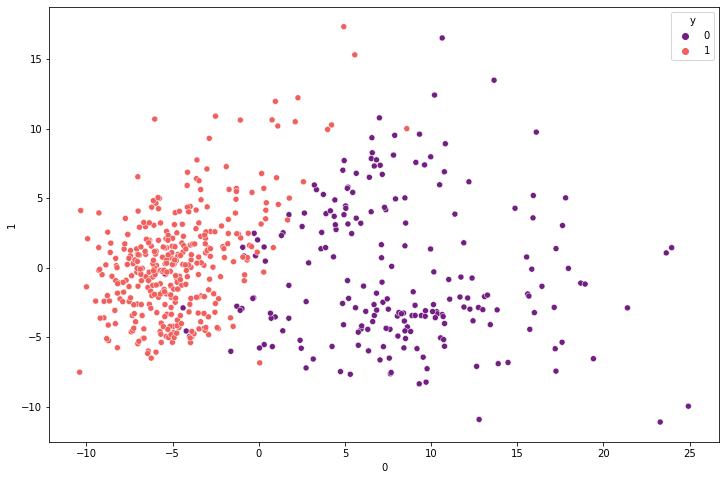

In [134]:
df_vis = pd.DataFrame(df_isomap)
df_vis['y'] = Y

plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_vis, x = 0, y = 1, hue = 'y',  palette = 'magma')
plt.show()

The chosen tabular dataset for dimensionality reduction was breast cancer dataset.

PCA worked better for tabular dataset in giving separate clusters.

TSNE worked better on separating the clusters than PCA as seen from the graph above.

UMAP turned out to be the most effective in terms of displaying the different clusters with clear separations.

SVD did not work well in separating out the clusters.

ISOMAP worked better than PCA and SVD in separating out the clusters.

LLE also did a good job in sepearting out clusters.